# Crime in Boston


This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

We are going to do some analysis like

In [78]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Data Loading
data=pd.read_csv('datasets/crime.csv')

In [3]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [11]:
data.DISTRICT.value_counts()

B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64

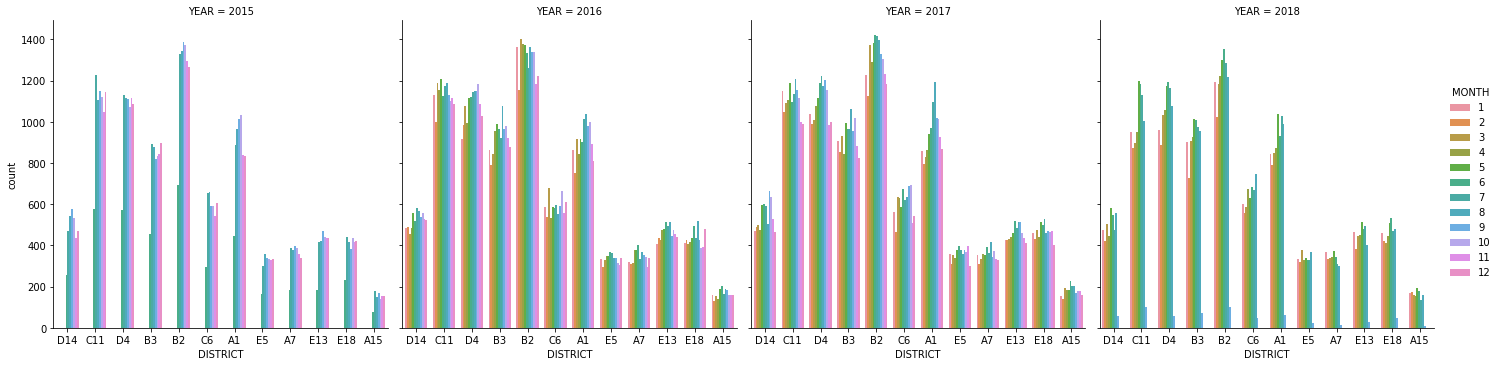

In [22]:
sns.catplot(x="DISTRICT", # Variable whose distribution (count) is of interest
            hue="MONTH",  # Show distribution, pos or -ve split-wise
            col="YEAR",   # Create two-charts/facets, gender-wise
            data=data,
            kind="count")
plt.show()

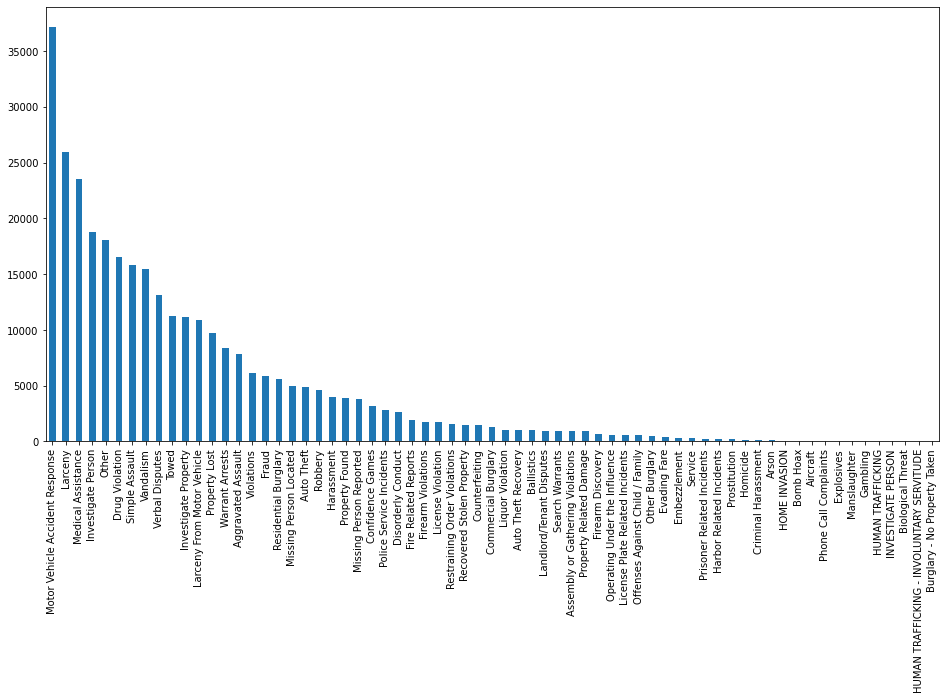

In [38]:
#Most crime done 
plt.figure(figsize=(16,8))
data["OFFENSE_CODE_GROUP"].value_counts().plot.bar()
plt.show()

Motor Vehicle Accident Response is most crime noted

# top5 OFFENSE_CODE_GROUP

In [89]:
offense=pd.pivot_table(data.loc[:,['OFFENSE_CODE_GROUP','YEAR','OFFENSE_CODE']],index='OFFENSE_CODE_GROUP', \
              columns='YEAR',aggfunc=np.count_nonzero)
summary=pd.DataFrame(offense.apply(np.sum,axis=1))
summary=summary.rename(columns={0:'total'})
sumsort=summary.sort_values(by='total',ascending=False)
top5=sumsort.iloc[0:5,:]
top5

,total
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,37132.0
Larceny,25935.0
Medical Assistance,23540.0
Investigate Person,18750.0
Other,18075.0


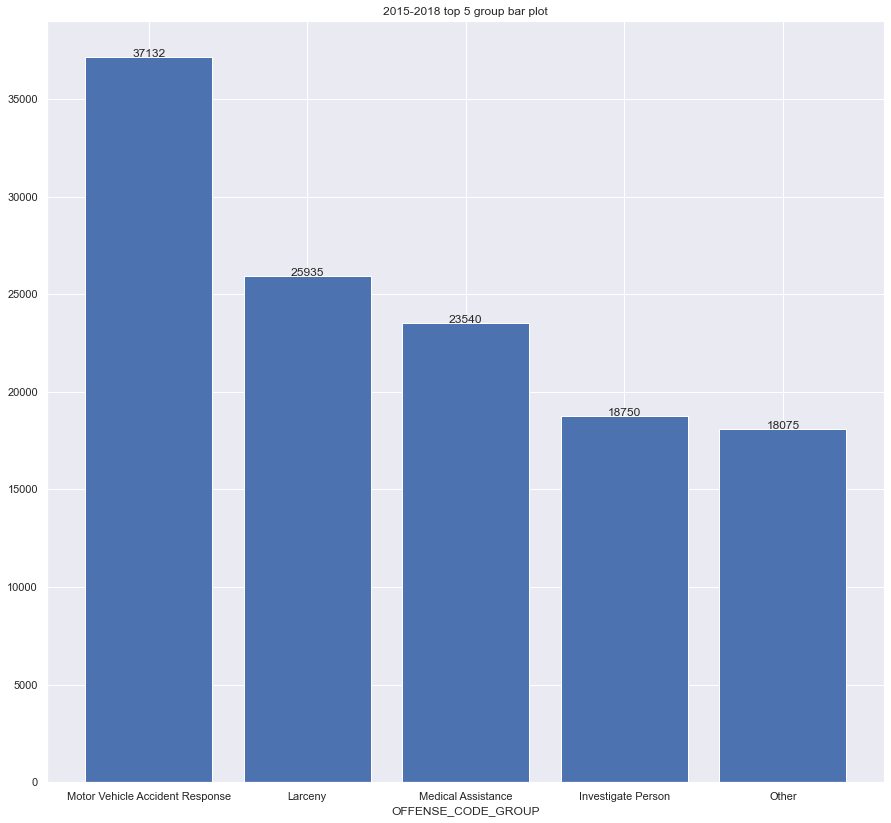

In [90]:
sns.set()
p0=plt.figure(figsize=(15,14))
plt.title(r'2015-2018 top 5 group bar plot')
plt.bar(range(top5.index.shape[0]),top5.loc[:,'total'])
plt.xlabel('OFFENSE_CODE_GROUP')
plt.xticks(range(top5.index.shape[0]),top5.index)
x=np.arange(top5.index.shape[0])
y=np.array(top5['total'])
for i,j in zip(x,y):
    plt.text(i,j,'%d'%j,ha='center')
p0.savefig('./top5_group_bar.png')
plt.show()

In [ ]:
# sns.countplot(x='YEAR',data=data)
plt.show()

In year 2017  most crimes were done and in 2015 least crimes 

# Visualization-by DISTRICT

In [91]:
disgroup=data.groupby(by='DISTRICT')
groupcount=disgroup.count()
groupcount.head()
number=groupcount.iloc[:,0]
number=pd.DataFrame(number)
number.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)
number.head()

,NUMBER
DISTRICT,
A1,35717
A15,6505
A7,13544
B2,49945
B3,35442


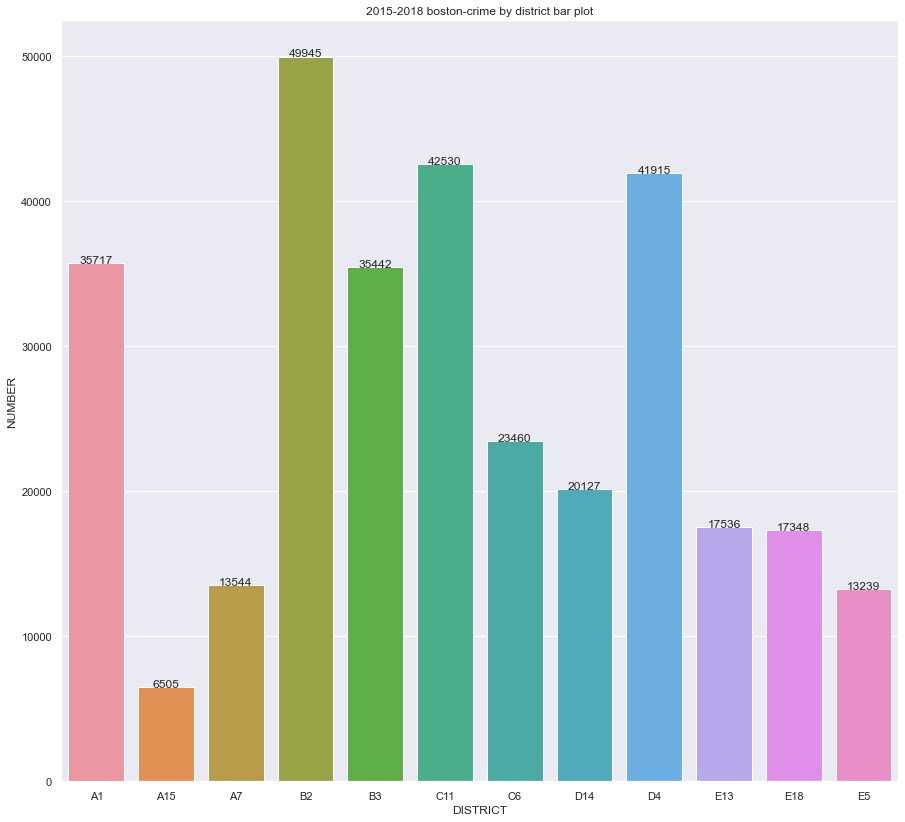

In [92]:
plt.figure(figsize=(15,14))
plt.title(r'2015-2018 boston-crime by district bar plot')
p1=sns.barplot(x=number.index,y='NUMBER',data=number)
x=np.arange(number.index.shape[0])
y=np.array(list(number['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05,'%d'%j,ha='center')
else:
    pass
p1fig=p1.get_figure()
p1fig.savefig('./total_by_district_bar.png')
plt.show()

As we can see district B2 has the highest crime rate followed by C11, D4 and so on. A15 is least

In [95]:
#Top 5 districts with high crime rate
districtsorted=number.sort_values(by='NUMBER',ascending=False)
top5=districtsorted.iloc[0:5,:]

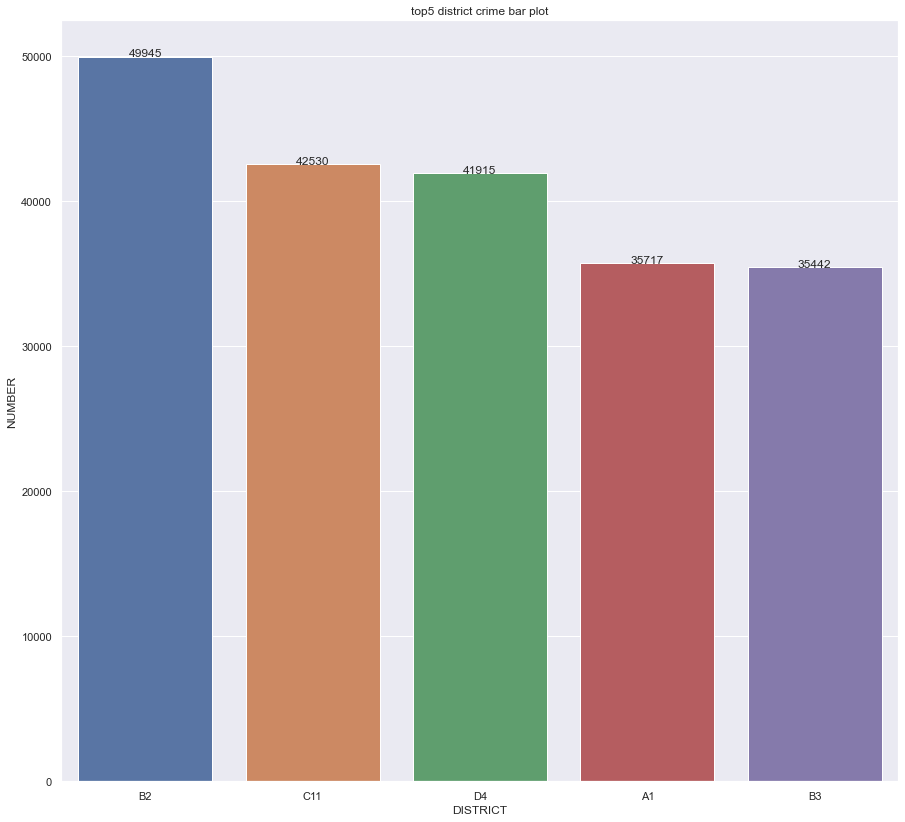

In [96]:
plt.figure(figsize=(15,14))
plt.title(r'top5 district crime bar plot')
p2=sns.barplot(x=top5.index,y='NUMBER',data=top5)
x=np.arange(top5.index.shape[0])
y=np.array(list(top5['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05,'%d'%j,ha='center')
else:
    pass
p2fig=p2.get_figure()
p2fig.savefig('./top5_district_crime_bar.png')
plt.show()

# Visualization-by YEAR

In [97]:
yeargroup=data.groupby(by='YEAR')
count=yeargroup.count()
yearnumber=pd.DataFrame(count.iloc[:,0])
yearnumber.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)
yearnumber

,NUMBER
YEAR,
2015,53388
2016,99114
2017,100886
2018,65685


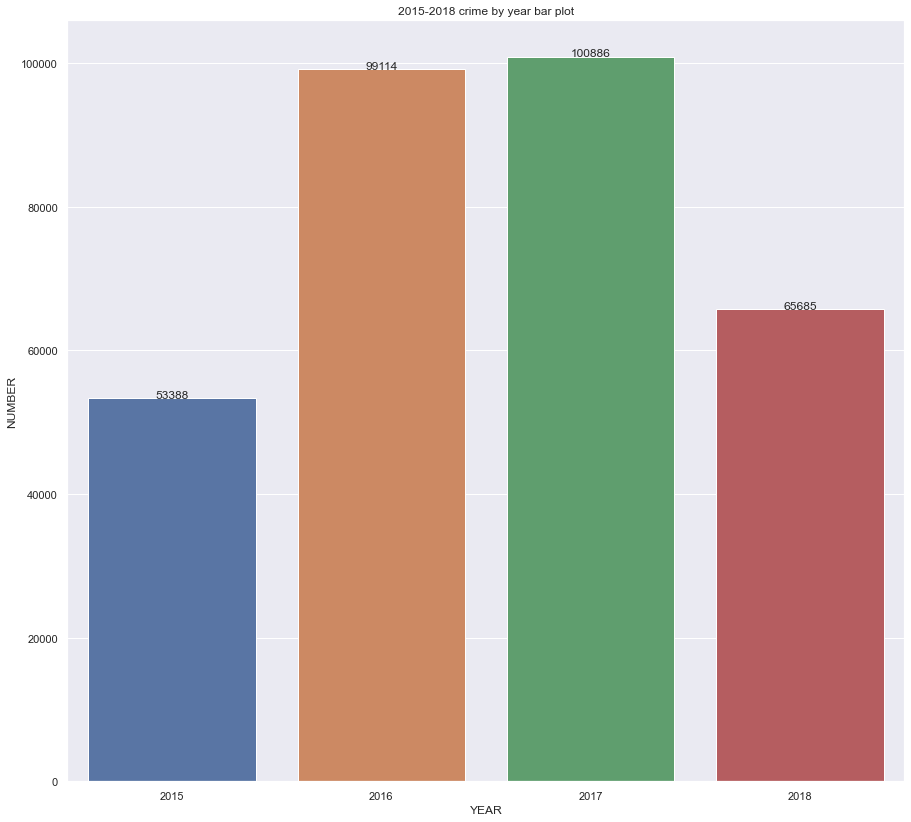

In [98]:
plt.figure(figsize=(15,14))
plt.title(r'2015-2018 crime by year bar plot')
p3=sns.barplot(x=yearnumber.index,y='NUMBER',data=yearnumber)
x=np.arange(yearnumber.index.shape[0])
y=np.array(list(yearnumber['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j,'%d'%j,ha='center')
else:
    pass
p3fig=p3.get_figure()
p3fig.savefig('./total_by_year_bar.png')
plt.show()

# Shooting crime summary and Visualization

In [103]:
data['SHOOTING']=data['SHOOTING'].fillna('N')

In [106]:
shootcrime=pd.pivot_table(data.loc[data['SHOOTING']=='Y',['YEAR','DISTRICT','SHOOTING']], \
               index='YEAR',columns='DISTRICT',aggfunc=np.count_nonzero)

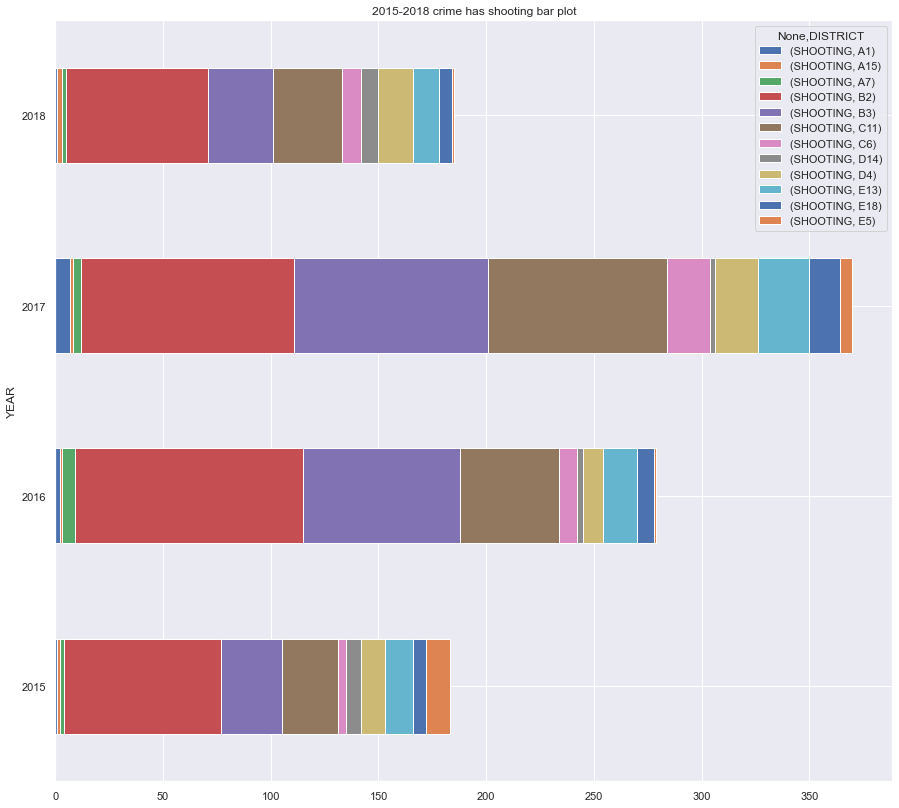

In [107]:
sns.set()
p4=shootcrime.plot(title=r'2015-2018 crime has shooting bar plot',figsize=(15,14),kind='barh',stacked=True)
p4fig=p4.get_figure()
p4fig.savefig('./total_shooting_crime_barh.png')
plt.show()

In [108]:
districtSum=shootcrime.apply(np.sum)
districtSum=pd.DataFrame(districtSum)

districtSum=districtSum.rename(columns={0:r'shooting total'})
districtSum=districtSum.sort_values(by=r'shooting total',ascending=False)
top5=districtSum.iloc[0:5,:]
top5

shooting total
         DISTRICT                
SHOOTING B2                   344
         B3                   221
         C11                  187
         E13                   65
         D4                    56

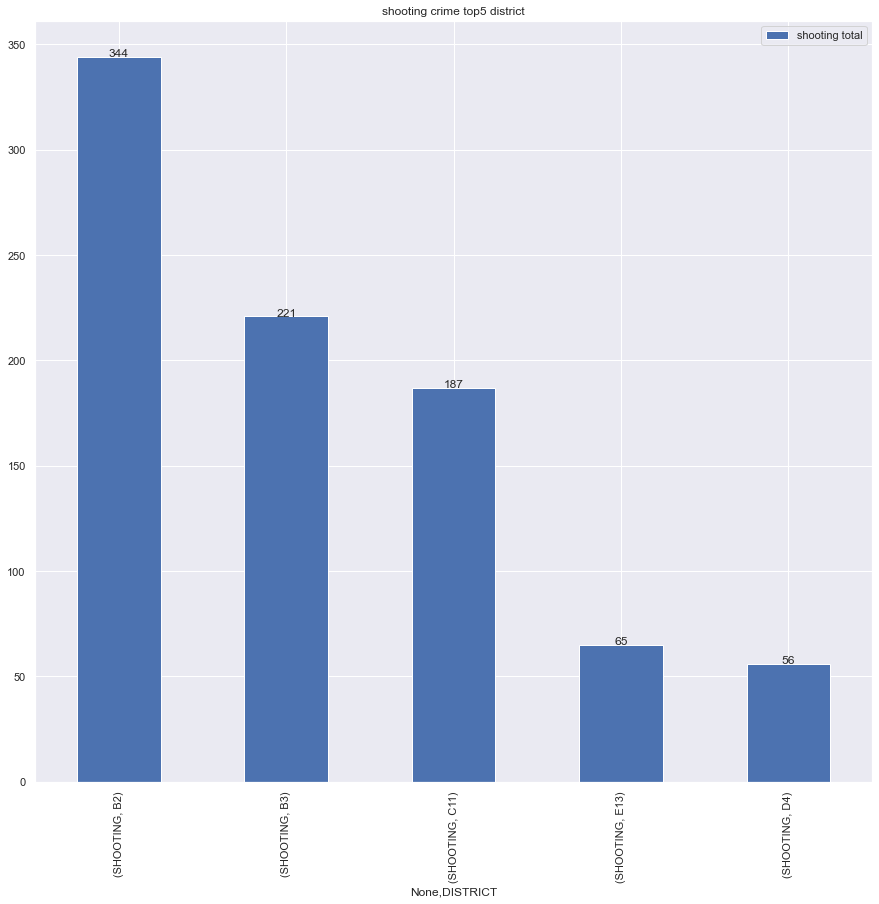

In [109]:
sns.set()
p5=top5.plot(title=r'shooting crime top5 district',figsize=(15,14),kind='bar')
x=np.arange(top5.index.shape[0])
y=np.array(list(top5[r'shooting total']))
for i,j in zip(x,y):
    plt.text(i,j,'%d'%j,ha='center')
p5fig=p5.get_figure()
p5fig.savefig('./shooting_crime_top5_bar.png')
plt.show()

As this chart,B2 is the highest

and B2's crime number is the highest

We may need to be alert with this distrcit

B3'crime is fifth,but shooting crime is second

With two charts,the more crime happened,the more shooting crime happened.

# Visualization-by Month

In [110]:
byMonth=data.groupby(by='MONTH')
Monthcount=byMonth.count()
MonthNumber=pd.DataFrame(Monthcount.iloc[:,0])
MonthNumber.head()

,INCIDENT_NUMBER
MONTH,
1,23610
2,21653
3,24146
4,24086
5,26199


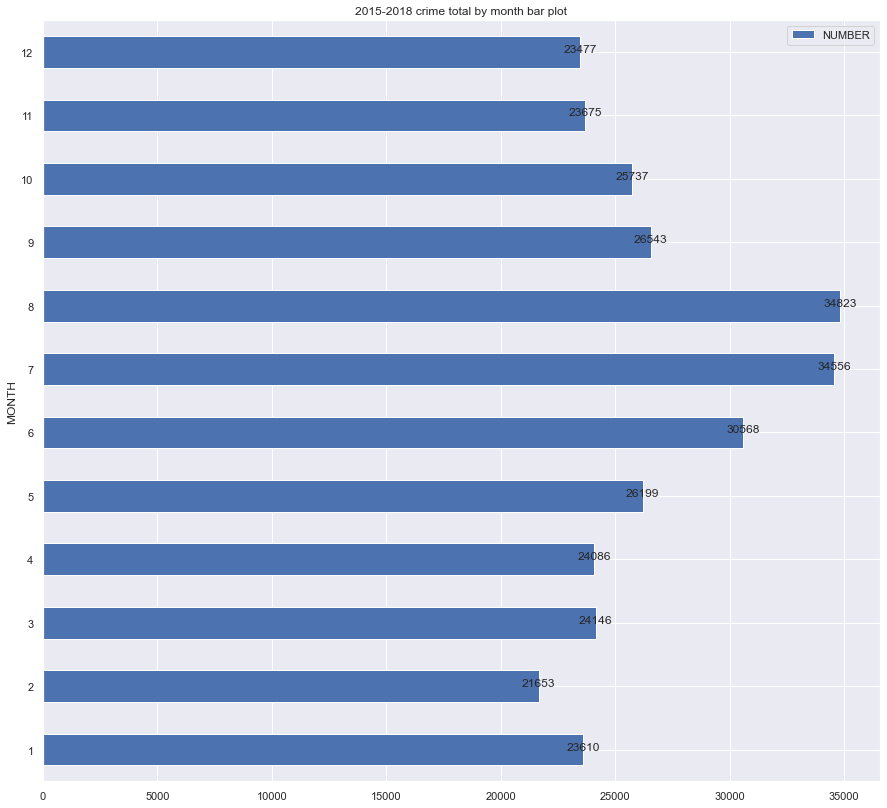

In [111]:
MonthNumber=MonthNumber.rename(columns={'INCIDENT_NUMBER':'NUMBER'})
sns.set()
p6=MonthNumber.plot(title=r'2015-2018 crime total by month bar plot',figsize=(15,14),kind='barh')
x=np.arange(MonthNumber.index.shape[0])
y=np.array(list(MonthNumber['NUMBER']))
for i,j in zip(x,y):
    plt.text(j,i,'%d'%j,ha='center')
p6fig=p6.get_figure()
p6fig.savefig('./total_by_month_bar.png')
plt.show()

With this chart,July~August more crime happened

December~Febuary is less

# Principal component analysis
find the most relative features

using PCA model to analysis

In [114]:
from sklearn.preprocessing import LabelEncoder
tras=data.iloc[:,:]
tras.loc[:,'OFFENSE_CODE_GROUP']=LabelEncoder().fit_transform(tras.loc[:,'OFFENSE_CODE_GROUP'])
tras.loc[:,'OFFENSE_DESCRIPTION']=LabelEncoder().fit_transform(tras.loc[:,'OFFENSE_DESCRIPTION'])
tras.loc[:,'DISTRICT']=LabelEncoder().fit_transform(tras.loc[:,'DISTRICT'].astype('str'))
tras.loc[:,'SHOOTING']=LabelEncoder().fit_transform(tras.loc[:,'SHOOTING'].astype('str'))
tras.loc[:,'DAY_OF_WEEK']=LabelEncoder().fit_transform(tras.loc[:,'DAY_OF_WEEK'])
tras.loc[:,'UCR_PART']=LabelEncoder().fit_transform(tras.loc[:,'UCR_PART'].astype('str'))
tras.loc[:,'STREET']=LabelEncoder().fit_transform(tras.loc[:,'STREET'].astype('str'))
tras.loc[:,'REPORTING_AREA']=LabelEncoder().fit_transform(tras.loc[:,'REPORTING_AREA'])

In [115]:
tras.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,34,129,10,784,0,2018-09-02 13:00:00,2018,9,3,13,1,1708,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,63,230,8,275,0,2018-08-21 00:00:00,2018,8,5,0,3,1195,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,62,222,11,60,0,2018-09-03 19:27:00,2018,9,1,19,2,4419,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,32,123,11,192,0,2018-09-03 21:16:00,2018,9,1,21,2,2297,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,32,123,7,357,0,2018-09-03 21:05:00,2018,9,1,21,2,270,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [116]:
data=tras.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET']]
target=tras.loc[:,'MONTH']

In [117]:
from sklearn.decomposition import PCA
pcamodel=PCA(n_components=11).fit(data)

In [120]:
print(pcamodel.explained_variance_ratio_)
'''
top2
OFFENSE_CODE
OFFENSE_CODE_GROUP
'''

[5.85771191e-01 3.94816203e-01 1.83340377e-02 1.00752783e-03
 5.47171694e-05 1.11225944e-05 3.63357116e-06 1.15900261e-06
 2.78223620e-07 1.29433699e-07 8.86901951e-10]


'\ntop2\nOFFENSE_CODE\nOFFENSE_CODE_GROUP\n'

With using PCA model,OFFENSE_CODE and OFFENSE_CODE_GROUP are main

# correlation analysis-pearson coefficient

In [121]:
pdata=tras.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET','MONTH']]
pearsonMatrix=pd.DataFrame(round(pdata.corr(method='pearson'),6))
pearsonMatrix.sort_values(by='MONTH',ascending=False)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,DAY_OF_WEEK,HOUR,UCR_PART,STREET,MONTH
MONTH,-0.014322,-0.005345,-0.010154,0.000417,0.000382,0.007902,-0.383351,0.003238,0.002051,-0.020926,0.000353,1.000000
SHOOTING,-0.058532,-0.076525,-0.051013,0.007481,0.006241,1.000000,-0.000905,-0.003211,0.004417,-0.045245,0.000793,0.007902
DAY_OF_WEEK,-0.002259,-0.001014,0.004835,0.004989,-0.005724,-0.003211,-0.000701,1.000000,0.008241,0.005914,0.001041,0.003238
HOUR,-0.017036,-0.022053,-0.015927,0.020672,0.006527,0.004417,0.001945,0.008241,1.000000,-0.008396,0.006419,0.002051
DISTRICT,-0.016792,0.013930,0.004345,1.000000,-0.014068,0.007481,-0.005645,0.004989,0.020672,-0.024719,-0.042615,0.000417
REPORTING_AREA,0.015614,0.011795,0.002503,-0.014068,1.000000,0.006241,-0.007961,-0.005724,0.006527,-0.001240,-0.068386,0.000382
STREET,-0.009311,-0.013806,-0.011361,-0.042615,-0.068386,0.000793,-0.011921,0.001041,0.006419,0.000079,1.000000,0.000353
OFFENSE_CODE_GROUP,0.251454,1.000000,0.563994,0.013930,0.011795,-0.076525,0.012781,-0.001014,-0.022053,0.192449,-0.013806,-0.005345
OFFENSE_DESCRIPTION,0.458466,0.563994,1.000000,0.004345,0.002503,-0.051013,0.017580,0.004835,-0.015927,0.077221,-0.011361,-0.010154
OFFENSE_CODE,1.000000,0.251454,0.458466,-0.016792,0.015614,-0.058532,0.045103,-0.002259,-0.017036,0.226822,-0.009311,-0.014322


With using pearson coefficient matrix,

SHOOTING,DAT_OF_WEEK and HOUR are more relative to predict Month

try to use three features to predict

# predict Month-using GBC
using GradientBoostingClassifier

In [124]:
sample=tras.sample(n=10000)
features=sample.loc[:,['SHOOTING','DAY_OF_WEEK','HOUR']]
target=sample.loc[:,'MONTH']

In [125]:
from sklearn.model_selection import train_test_split
dataTrain,dataTest, \
targetTrain,targetTest= \
train_test_split(features,target,train_size=0.8)

In [126]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
crimeGBC=GBC(max_depth=12)
crimeGBC.fit(dataTrain,targetTrain)

GradientBoostingClassifier(max_depth=12)

In [127]:
pred=crimeGBC.predict(dataTrain)

In [128]:
from sklearn.metrics import classification_report
print(classification_report(targetTrain,pred))

              precision    recall  f1-score   support

           1       0.16      0.05      0.08       596
           2       0.15      0.06      0.09       509
           3       0.15      0.15      0.15       582
           4       0.16      0.08      0.11       625
           5       0.17      0.13      0.15       642
           6       0.18      0.21      0.20       769
           7       0.17      0.32      0.22       871
           8       0.17      0.35      0.23       895
           9       0.16      0.18      0.17       685
          10       0.17      0.11      0.13       660
          11       0.16      0.11      0.13       608
          12       0.20      0.06      0.09       558

    accuracy                           0.17      8000
   macro avg       0.17      0.15      0.15      8000
weighted avg       0.17      0.17      0.15      8000



In [129]:
predict=crimeGBC.predict(dataTest)
print(classification_report(targetTest,predict))

              precision    recall  f1-score   support

           1       0.10      0.04      0.06       137
           2       0.07      0.03      0.04       132
           3       0.07      0.08      0.07       132
           4       0.03      0.01      0.02       149
           5       0.06      0.05      0.05       187
           6       0.10      0.10      0.10       207
           7       0.11      0.20      0.14       228
           8       0.13      0.27      0.18       233
           9       0.08      0.09      0.08       152
          10       0.09      0.07      0.08       150
          11       0.10      0.08      0.09       134
          12       0.16      0.04      0.07       159

    accuracy                           0.10      2000
   macro avg       0.09      0.09      0.08      2000
weighted avg       0.09      0.10      0.09      2000



In [130]:
from sklearn.metrics import accuracy_score
print(accuracy_score(targetTest,predict))

0.1
